## Objective

### The goal of this data analysis project using SQL would be to identifies opportunities to increase the occupency rate on low performing flights. Which can ultimately leads to increase the profitability for the airline. 

## Importing libraries

In [28]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Database Connection

In [29]:
connection  = sqlite3.connect('travel.sqlite')    #create connection object and asssign to variable, connect is used to establish connection with database.
cursor = connection.cursor()            #Creates a Cursor object to interact with the database.

In [30]:
cursor.execute("""select name from sqlite_master where type = 'table';""") #sqlite_master is a system table in SQLite that contains information about all database objects (like tables, indexes, and triggers).
print("list of tables is:")
table_list = [table[0] for table in cursor.fetchall()]
table_list

list of tables is:


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Data Exploration

In [31]:
aircrafts_data = pd.read_sql_query("""select * from aircrafts_data""",connection)
aircrafts_data.head(5)

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [32]:
airports_data = pd.read_sql_query("""select * from airports_data""",connection)
airports_data.head(5)

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [33]:
boarding_passes = pd.read_sql_query("""select * from boarding_passes""",connection)
boarding_passes.head(5)

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [34]:
bookings = pd.read_sql_query("""select * from bookings""",connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [35]:
flights = pd.read_sql_query("""select * from flights""",connection)
flights.head(5)

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [36]:
seats = pd.read_sql_query("""select * from seats""",connection)
seats.head(5)

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [37]:
ticket_flights = pd.read_sql_query("""select * from ticket_flights""",connection)
ticket_flights.head(5)

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [38]:
tickets = pd.read_sql_query("""select * from tickets""",connection)
tickets.head(5)

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


#### check datatypes for each column in tables


In [39]:
for table in table_list:
    print('\ntable_name:', table)
    column_info = connection.execute("PRAGMA table_info({})".format(table))  #command retrieves information about the columns in the specified table.
    for column in column_info.fetchall():
        print(column[0:3])


table_name: aircrafts_data
(0, 'aircraft_code', 'character(3)')
(1, 'model', 'jsonb')
(2, 'range', 'INTEGER')

table_name: airports_data
(0, 'airport_code', 'character(3)')
(1, 'airport_name', 'jsonb')
(2, 'city', 'jsonb')
(3, 'coordinates', 'point')
(4, 'timezone', 'TEXT')

table_name: boarding_passes
(0, 'ticket_no', 'character(13)')
(1, 'flight_id', 'INTEGER')
(2, 'boarding_no', 'INTEGER')
(3, 'seat_no', 'character varying(4)')

table_name: bookings
(0, 'book_ref', 'character(6)')
(1, 'book_date', 'timestamp with time zone')
(2, 'total_amount', 'numeric(10,2)')

table_name: flights
(0, 'flight_id', 'INTEGER')
(1, 'flight_no', 'character(6)')
(2, 'scheduled_departure', 'timestamp with time zone')
(3, 'scheduled_arrival', 'timestamp with time zone')
(4, 'departure_airport', 'character(3)')
(5, 'arrival_airport', 'character(3)')
(6, 'status', 'character varying(20)')
(7, 'aircraft_code', 'character(3)')
(8, 'actual_departure', 'timestamp with time zone')
(9, 'actual_arrival', 'timesta

#### check null values in each column of tables

In [40]:
for table in table_list:
    df = pd.read_sql_query(f"select * from {table}",connection)
    print(df.isnull().sum())

aircraft_code    0
model            0
range            0
dtype: int64
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64
book_ref        0
book_date       0
total_amount    0
dtype: int64
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# Basic Analysis

### How many planes have more than 100 seats?

In [41]:
planes_with_more_than_100_seats = pd.read_sql_query("""select aircraft_code, count(*) as no_seats from seats group by aircraft_code having no_seats > 100""", connection)
planes_with_more_than_100_seats

,aircraft_code,no_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


### How the total no. of tickets booked and total amount earning changed with the time. 

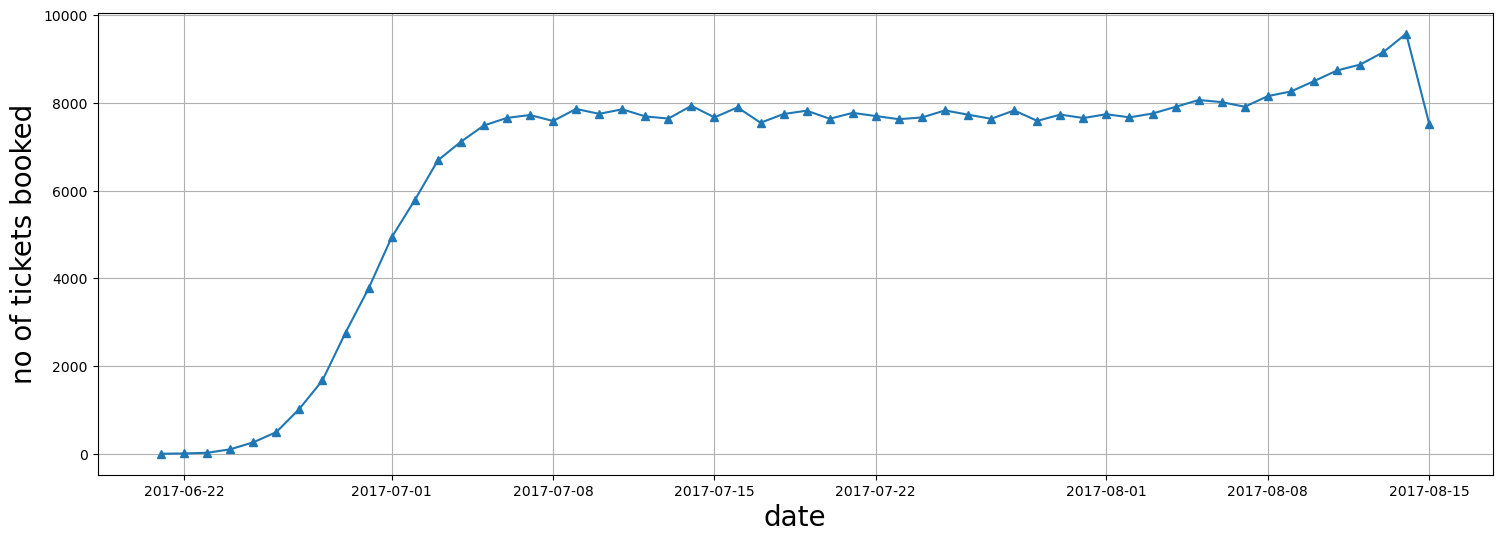

In [42]:
tickets = pd.read_sql_query("""select * from tickets inner join bookings on bookings.book_ref = tickets.book_ref""", connection)

tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date

x = tickets.groupby('date')[['date']].count()

plt.figure(figsize=(18,6))
plt.plot(x.index,x['date'], marker = '^')   #each point on the plot will be represented as '^'
plt.xlabel('date', fontsize=20)
plt.ylabel('no of tickets booked', fontsize=20)
plt.grid('b')
plt.show()

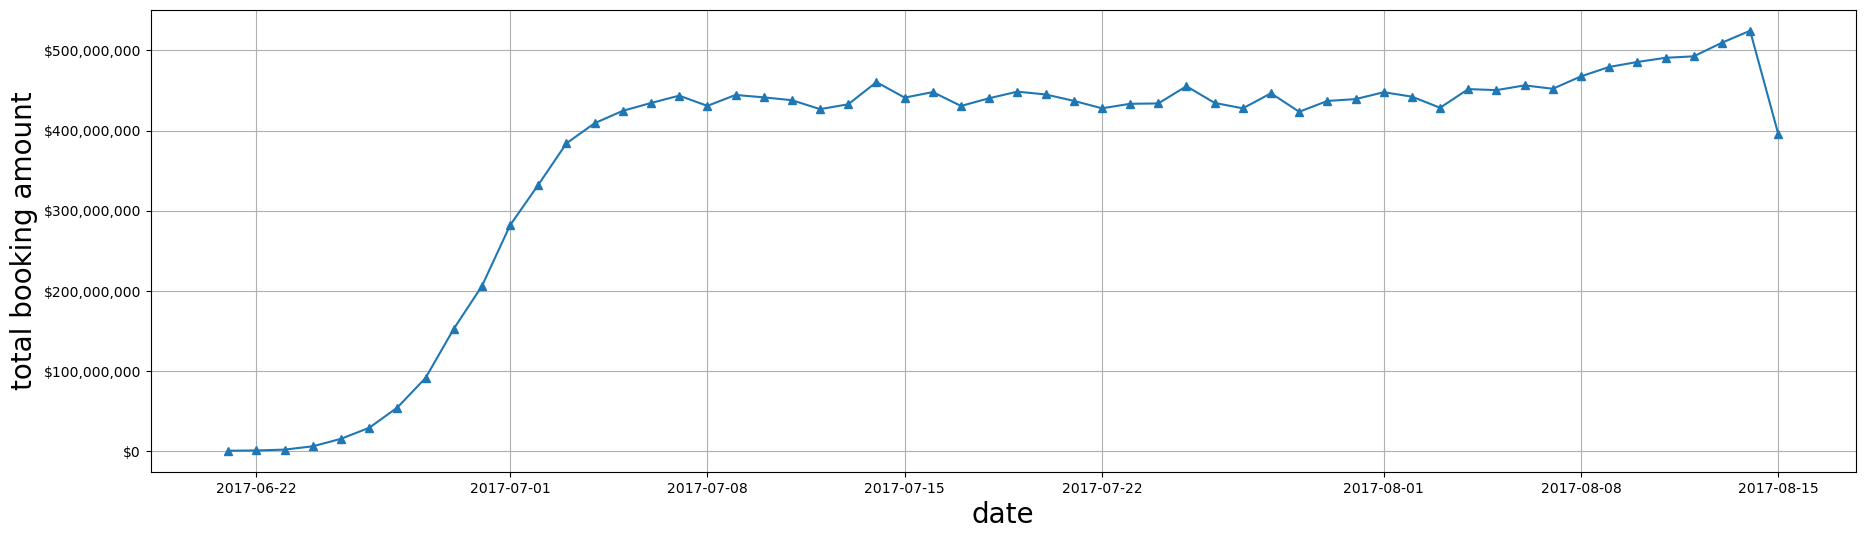

In [43]:
from matplotlib.ticker import FuncFormatter

bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date

x = bookings.groupby('date')[['total_amount']].sum()

# Define a formatter function for the y-axis
def currency_formatter(x, pos):
    return f'${x:,.0f}'

# Apply the formatter to the y-axis
formatter = FuncFormatter(currency_formatter)

plt.figure(figsize=(22,6))
plt.plot(x.index,x['total_amount'], marker='^')
plt.xlabel('date', fontsize=20)
plt.ylabel('total booking amount', fontsize=20)
plt.gca().yaxis.set_major_formatter(formatter)  # Apply the formatter to the y-axis
plt.grid('b')
plt.show()

### Calculate the avg charges for each aircraft type with different fare condition

In [44]:
df = pd.read_sql_query("""select aircraft_code,fare_conditions, avg(amount) from ticket_flights inner join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code,fare_conditions""", connection)
df['avg(amount)'] = df['avg(amount)'].round(1)
df

,aircraft_code,fare_conditions,avg(amount)
0,319,Business,113550.6
1,319,Economy,38311.4
2,321,Business,34435.7
3,321,Economy,11535.0
4,733,Business,41865.6
5,733,Economy,13985.2
6,763,Business,82839.8
7,763,Economy,27594.7
8,773,Business,57779.9
9,773,Comfort,32740.6


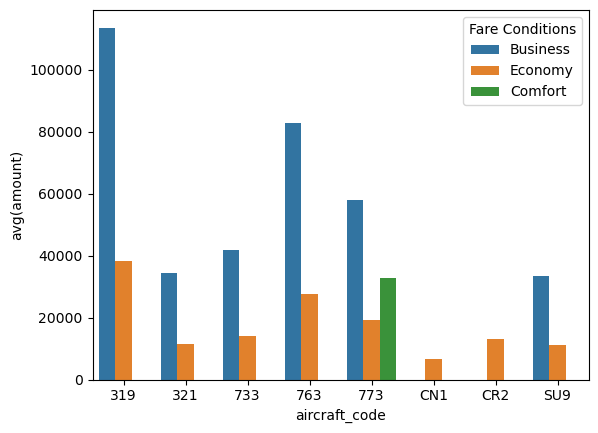

In [45]:
sns.barplot(data=df, x='aircraft_code', y='avg(amount)', hue='fare_conditions')
plt.legend(title='Fare Conditions', loc='upper right')  # Change 'upper right' to desired location

# Analyzing occupancy rate

### For each aircraft calculate the total revenue per year and the average revenue per ticket.

In [46]:
revenue_per_year = pd.read_sql_query("""select aircraft_code, ticket_count, total_revenue, total_revenue/ticket_count as avg_rev_per_tick from (select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights inner join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code) """, connection)
revenue_per_year

,aircraft_code,ticket_count,total_revenue,avg_rev_per_tick
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


### Calculate average occupancy per aircraft.

In [47]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code, avg(a.booking_count) as book_seats, b.no_seats, avg(a.booking_count)/b.no_seats as occupancy_rate 
from
(
select aircraft_code, flights.flight_id, count(*) as booking_count from boarding_passes
            inner join 
            flights on boarding_passes.flight_id = flights.flight_id
            group by 
            aircraft_code, flights.flight_id) as a
            
            inner join
            
            (select aircraft_code, count(*) as no_seats from seats group by aircraft_code) as b
            on a.aircraft_code = b.aircraft_code group by a.aircraft_code""", connection)
occupancy_rate

,aircraft_code,book_seats,no_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


### Calculate by how much the total revenue could increase by giving all aircrafts a 10% higher occupancy rate.

In [48]:
occupancy_rate['inc_occu_rate'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,book_seats,no_seats,occupancy_rate,inc_occu_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [49]:
total_revenue = pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from ticket_flights inner join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code""", connection)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [50]:
occupancy_rate['total_revenue'] = total_revenue['total_revenue']
occupancy_rate['inc_total_revenue'] = ((total_revenue['total_revenue']*occupancy_rate['inc_occu_rate'])/occupancy_rate['occupancy_rate'])
occupancy_rate

,aircraft_code,book_seats,no_seats,occupancy_rate,inc_occu_rate,total_revenue,inc_total_revenue
0,319,53.583181,116,0.461924,0.508116,2706163100,2.976779e+09
1,321,88.809231,170,0.522407,0.574648,1638164100,1.801981e+09
2,733,80.255462,130,0.617350,0.679085,1426552100,1.569207e+09
3,763,113.937294,222,0.513231,0.564554,4371277100,4.808405e+09
4,773,264.925806,402,0.659019,0.724921,3431205500,3.774326e+09
5,CN1,6.004431,12,0.500369,0.550406,96373800,1.060112e+08
6,CR2,21.482847,50,0.429657,0.472623,1982760500,2.181037e+09
7,SU9,56.812113,97,0.585692,0.644261,5114484700,5.625933e+09
